# Telco Customer Churn Prediction

In [1]:
# Importing libs
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn as sk
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
from sklearn.metrics import accuracy_score, precision_score,recall_score, f1_score
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

# Models
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import (
    GradientBoostingClassifier,
    AdaBoostClassifier,
    StackingClassifier,
    VotingClassifier
)
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.tree import DecisionTreeClassifier
from catboost import CatBoostClassifier

## Get the data

In [2]:
data_path = "../artifacts/data"
files = os.listdir(data_path)
files
for file in files:
    file_name = os.path.splitext(file)[0]
    globals()[f'{file_name}_df'] = pd.read_excel(os.path.join(data_path, file))

df_s = [
    
    Telco_customer_churn_df,

    Telco_customer_churn_demographics_df,

    Telco_customer_churn_location_df,
    
    Telco_customer_churn_population_df,
    
    Telco_customer_churn_services_df,
    
    Telco_customer_churn_services_df,
    
    CustomerChurn_df
]

## Data Analysis and EDA/Visualization

In [ ]:
Telco_customer_churn_df.head()

In [ ]:
Telco_customer_churn_df.info()

In [3]:
# Investigating all categorical values in the dataset
categorical_data = []
for column in Telco_customer_churn_df:
    value_counts = pd.value_counts(Telco_customer_churn_df[column])
    value_counts_len = len(value_counts.index.to_list())

    if value_counts_len < 10 and value_counts_len!=1:
        categorical_data.append(column)
        print(f"Unique values for column '{column}' : {value_counts.index.to_list()} having len {value_counts_len}")

Unique values for column 'Gender' : ['Male', 'Female'] having len 2
Unique values for column 'Senior Citizen' : ['No', 'Yes'] having len 2
Unique values for column 'Partner' : ['No', 'Yes'] having len 2
Unique values for column 'Dependents' : ['No', 'Yes'] having len 2
Unique values for column 'Phone Service' : ['Yes', 'No'] having len 2
Unique values for column 'Multiple Lines' : ['No', 'Yes', 'No phone service'] having len 3
Unique values for column 'Internet Service' : ['Fiber optic', 'DSL', 'No'] having len 3
Unique values for column 'Online Security' : ['No', 'Yes', 'No internet service'] having len 3
Unique values for column 'Online Backup' : ['No', 'Yes', 'No internet service'] having len 3
Unique values for column 'Device Protection' : ['No', 'Yes', 'No internet service'] having len 3
Unique values for column 'Tech Support' : ['No', 'Yes', 'No internet service'] having len 3
Unique values for column 'Streaming TV' : ['No', 'Yes', 'No internet service'] having len 3
Unique value

In [ ]:
# Telco_customer_churn_df_copy = Telco_customer_churn_df.copy().fillna(''),
# Telco_customer_churn_demographics_df_copy = Telco_customer_churn_demographics_df.copy().fillna(''),
# Telco_customer_churn_location_df_copy = Telco_customer_churn_location_df.copy().fillna(''),
# Telco_customer_churn_population_df_copy = Telco_customer_churn_population_df.copy().fillna(''),
# Telco_customer_churn_services_df_copy = Telco_customer_churn_services_df.copy().fillna(''),
# Telco_customer_churn_services_df_copy = Telco_customer_churn_services_df.copy().fillna(''),

# df_s = [
#     Telco_customer_churn_df_copy,
#     Telco_customer_churn_demographics_df_copy,
#     Telco_customer_churn_location_df_copy,
#     Telco_customer_churn_population_df_copy,
#     Telco_customer_churn_services_df_copy,
#     Telco_customer_churn_services_df_copy
# ]
# os.makedirs("./df_info", exist_ok=True)
# count = 0
# for df in enumerate(df_s):
#     file_path = f'./df_info/{count}.txt'
#     count+=1
#     info_str = df.info(buf=None)
#     with open(file_path, "w") as f:
#         f.write(info_str)

In [ ]:
# The 5 df's (subset of telco_churn) demographics/location etc. are to be dealt with.
categorical_data

#### Categorical Data

In [ ]:
# Custom plot
fig, axes = plt.subplots(9,2, figsize=(15,40))
axes = axes.flatten()
for i in range(len(categorical_data)):
    features = categorical_data[i]
    sns.countplot(x=features, data=Telco_customer_churn_df, palette = 'Set2', ax=axes[i], hue='Churn Value')

plt.tight_layout()
plt.show()

#### Continous Data

In [ ]:
continous_data = ['Monthly Charges', 'Churn Score', 'CLTV']
fig, axes = plt.subplots(3,1, figsize=(10,15))
axes = axes.flatten()
for i in range(len(continous_data)):
    features = continous_data[i]
    sns.histplot(x=features, data=Telco_customer_churn_df, ax=axes[i], palette='Paired', hue='Churn Value')
plt.tight_layout()
plt.show()

In [ ]:
continous_data = ['Tenure in Months', 'Total Revenue', 'Total Charges']
fig, axes = plt.subplots(3,1, figsize=(10,15))
axes = axes.flatten()
for i in range(len(continous_data)):
    features = continous_data[i]
    sns.histplot(x=features, data=Telco_customer_churn_services_df, ax=axes[i])
plt.tight_layout()
plt.show()

#### Number of Dependents

In [ ]:
plt.figure(figsize=(8,10))
sns.violinplot(Telco_customer_churn_demographics_df, y='Number of Dependents', color='m')
plt.xlabel("Number of Dependents")
plt.ylabel("Count")
plt.title("Number of Dependents Count")
plt.show()

In [20]:
# Distribution of People around the city.
fig = px.scatter_mapbox(
    Telco_customer_churn_df,
    lat = 'Latitude',
    lon = 'Longitude',
    color = 'Churn Score',
    hover_name = 'Churn Value',
    # size = 'Churn Value',
    zoom = 5, 
    height = 800,
    width = 800
)
fig.update_layout(mapbox_style="open-street-map")
fig.show()

In [ ]:
# Reason for churn -> most imp to analyze
plt.figure(figsize=(25,40))
sns.countplot(y='Churn Reason', data=Telco_customer_churn_df)
# plt.legend()
plt.title("Churn Reasons")
sns.set(font_scale=5)
# plt.tight_layout()
plt.show()

## Feature Engineering

In [4]:
# Categorical Data -> LabelEncoder()
df = Telco_customer_churn_df.copy()
label_encoder = LabelEncoder()
categorical_features = [
    'Gender', 'Senior Citizen', 'Partner', 'Dependents', 'Phone Service', 'Multiple Lines',
    'Internet Service','Online Security', 'Online Backup', 'Device Protection', 'Tech Support', 
    'Streaming TV', 'Streaming Movies', 'Contract','Paperless Billing', 'Payment Method', 'Churn Value'
]

for col in categorical_features:
    df[col] = label_encoder.fit_transform(df[col])
    print(col,' : ',df[col].unique(),' = ',label_encoder.inverse_transform(df[col].unique()))


Gender  :  [1 0]  =  ['Male' 'Female']
Senior Citizen  :  [0 1]  =  ['No' 'Yes']
Partner  :  [0 1]  =  ['No' 'Yes']
Dependents  :  [0 1]  =  ['No' 'Yes']
Phone Service  :  [1 0]  =  ['Yes' 'No']
Multiple Lines  :  [0 2 1]  =  ['No' 'Yes' 'No phone service']
Internet Service  :  [0 1 2]  =  ['DSL' 'Fiber optic' 'No']
Online Security  :  [2 0 1]  =  ['Yes' 'No' 'No internet service']
Online Backup  :  [2 0 1]  =  ['Yes' 'No' 'No internet service']
Device Protection  :  [0 2 1]  =  ['No' 'Yes' 'No internet service']
Tech Support  :  [0 2 1]  =  ['No' 'Yes' 'No internet service']
Streaming TV  :  [0 2 1]  =  ['No' 'Yes' 'No internet service']
Streaming Movies  :  [0 2 1]  =  ['No' 'Yes' 'No internet service']
Contract  :  [0 2 1]  =  ['Month-to-month' 'Two year' 'One year']
Paperless Billing  :  [1 0]  =  ['Yes' 'No']
Payment Method  :  [3 2 0 1]  =  ['Mailed check' 'Electronic check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn Value  :  [1 0]  =  [1 0]


In [5]:
df.head()

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,1,...,0,1,3,53.85,108.15,Yes,1,86,3239,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,0,...,0,1,2,70.70,151.65,Yes,1,67,2701,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,0,...,0,1,2,99.65,820.5,Yes,1,86,5372,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,0,...,0,1,2,104.80,3046.05,Yes,1,84,5003,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,1,...,0,1,0,103.70,5036.3,Yes,1,89,5340,Competitor had better devices


### Correlation Heatmap{Matrix}

In [ ]:
df.info()

In [6]:
df.drop(['CustomerID', 'Lat Long', 'Churn Reason', 'Country', 'State', 'City', 'Zip Code', 'Churn Label', 'Count'], axis=1, inplace=True)

In [7]:
df['Total Charges'] = pd.to_numeric(df['Total Charges'], errors='coerce')

In [8]:
df.dropna(axis=0, inplace=True)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Latitude           7032 non-null   float64
 1   Longitude          7032 non-null   float64
 2   Gender             7032 non-null   int32  
 3   Senior Citizen     7032 non-null   int32  
 4   Partner            7032 non-null   int32  
 5   Dependents         7032 non-null   int32  
 6   Tenure Months      7032 non-null   int64  
 7   Phone Service      7032 non-null   int32  
 8   Multiple Lines     7032 non-null   int32  
 9   Internet Service   7032 non-null   int32  
 10  Online Security    7032 non-null   int32  
 11  Online Backup      7032 non-null   int32  
 12  Device Protection  7032 non-null   int32  
 13  Tech Support       7032 non-null   int32  
 14  Streaming TV       7032 non-null   int32  
 15  Streaming Movies   7032 non-null   int32  
 16  Contract           7032 non-n

In [10]:
corr_matrix = df.corr()
corr_matrix["Churn Value"].sort_values(ascending=False).to_frame()

,Churn Value
Churn Value,1.000000
Churn Score,0.664970
Monthly Charges,0.192858
Paperless Billing,0.191454
Senior Citizen,0.150541
Payment Method,0.107852
Multiple Lines,0.038043
Phone Service,0.011691
Longitude,0.004693
Latitude,-0.003600


<Axes: >

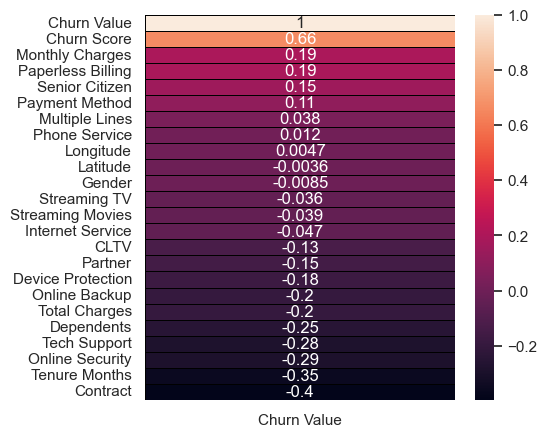

In [11]:
plt.figure(figsize = (5,5))
sns.set(font_scale=1)
sns.heatmap(corr_matrix["Churn Value"].sort_values(ascending=False).to_frame(), annot = True,linewidths = 0.4,linecolor = 'black')

Chi SQuare Test for Feature Selection

In [21]:
chi_cat_features = df.loc[:,categorical_features]
chi_target = df.loc[:,'Churn Value']
best_features_chi = SelectKBest(score_func=chi2, k='all')
features_fit_chi = best_features_chi.fit(chi_cat_features, chi_target)
features_score_chi = pd.DataFrame(data=features_fit_chi.scores_, index=list(chi_cat_features.columns), columns=['Chi Squared Score'])
features_score_chi

KeyError: "['Gender', 'Senior Citizen', 'Partner', 'Dependents', 'Phone Service', 'Multiple Lines', 'Internet Service', 'Online Security', 'Online Backup', 'Device Protection', 'Tech Support', 'Streaming TV', 'Streaming Movies', 'Contract', 'Paperless Billing', 'Payment Method'] not in index"

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(features_score_chi.sort_values(ascending = False,by = 'Chi Squared Score'), annot=True, fmt = '.2f')
plt.title("Chi Square Test for Ctaegorical Feature Selection")
plt.show()

In [12]:
dummy_cat_features = [
    'Gender', 'Senior Citizen', 'Partner', 'Dependents', 'Phone Service', 'Multiple Lines',
    'Internet Service','Online Security', 'Online Backup', 'Device Protection', 'Tech Support', 
    'Streaming TV', 'Streaming Movies', 'Contract','Paperless Billing', 'Payment Method'
]
df = pd.get_dummies(df, columns=dummy_cat_features, drop_first=True)
df.head()

,Latitude,Longitude,Tenure Months,Monthly Charges,Total Charges,Churn Value,Churn Score,CLTV,Gender_1,Senior Citizen_1,...,Streaming TV_1,Streaming TV_2,Streaming Movies_1,Streaming Movies_2,Contract_1,Contract_2,Paperless Billing_1,Payment Method_1,Payment Method_2,Payment Method_3
0,33.964131,-118.272783,2,53.85,108.15,1,86,3239,True,False,...,False,False,False,False,False,False,True,False,False,True
1,34.059281,-118.307420,2,70.70,151.65,1,67,2701,False,False,...,False,False,False,False,False,False,True,False,True,False
2,34.048013,-118.293953,8,99.65,820.50,1,86,5372,False,False,...,False,True,False,True,False,False,True,False,True,False
3,34.062125,-118.315709,28,104.80,3046.05,1,84,5003,False,False,...,False,True,False,True,False,False,True,False,True,False
4,34.039224,-118.266293,49,103.70,5036.30,1,89,5340,True,False,...,False,True,False,True,False,False,True,False,False,False


In [ ]:
df.info()

### Data Preparation

In [13]:
X = df.drop(['Churn Value'], axis=1).copy()
Y = df['Churn Value']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [14]:
print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)

(5625, 34) (5625,)
(1407, 34) (1407,)


## Model Training

### Model Preparation

In [15]:
models = {
    'Logistic Regression' : LogisticRegression(),
    'Gaussian Naive Bayes' : GaussianNB(),
    'K Nearest Neighbors' : KNeighborsClassifier(),
    'Support Vector Machine' : SVC(probability=True),
    'Decision Tree Classifier' : DecisionTreeClassifier(),
    'Random Forest Classifier' : RandomForestClassifier(),
    'Bagging Classifier' : BaggingClassifier(
        base_estimator=RandomForestClassifier(),
        n_estimators=10
    ),
    'Gradient Boosting Classifier' : GradientBoostingClassifier(),
    'AdaBoost' : AdaBoostClassifier(
        base_estimator=DecisionTreeClassifier(),
        n_estimators=50
    ),
    'Stacking Classifier' : StackingClassifier(
        estimators=[
            ('log_reg', LogisticRegression()),
            ('random_forest', RandomForestClassifier()),
            ('grad_boost', GradientBoostingClassifier())
        ]
    ),
    'Voting Classifier' : VotingClassifier(
        estimators=[
            ('log_reg', LogisticRegression()),
            ('random_forest', RandomForestClassifier()),
            ('grad_boost', GradientBoostingClassifier())
        ]
    ),
    'XgBoost' : XGBClassifier(),
    'LightGBM' : LGBMClassifier(),
    'Catboost' : CatBoostClassifier()
    }
model_accs = []
model_precs = []
model_recalls = []
model_f1s = []


# Models used for Training
'''
    1) RandomForestClassifier(n_estimators=100, class_weight={0:1,1:3})
    2) XGBClassifier()
    3) LGBMClassifier(learning_rate=0.09,max_depth=-5,scale_pos_weight =3,
                    random_state=42, objective = 'binary')
    4) Bagging Classifier
'''

"\n    1) RandomForestClassifier(n_estimators=100, class_weight={0:1,1:3})\n    2) XGBClassifier()\n    3) LGBMClassifier(learning_rate=0.09,max_depth=-5,scale_pos_weight =3,\n                    random_state=42, objective = 'binary')\n    4) Bagging Classifier\n"

### Training

In [17]:
import warnings
warnings.filterwarnings("ignore")

In [19]:
for model_name, model in models.items():
    model.fit(X_train, Y_train)
    Y_pred = model.predict(X_test)
    accuracy = accuracy_score(Y_test, Y_pred)
    print(f"Model : {model_name}")
    print(f"Accuracy : {accuracy}")
    print(classification_report(Y_test, Y_pred))
    print()

Model : Logistic Regression
Accuracy : 0.8976545842217484
              precision    recall  f1-score   support

           0       0.92      0.93      0.93      1012
           1       0.83      0.80      0.81       395

    accuracy                           0.90      1407
   macro avg       0.88      0.87      0.87      1407
weighted avg       0.90      0.90      0.90      1407


Model : Gaussian Naive Bayes
Accuracy : 0.8173418621179815
              precision    recall  f1-score   support

           0       0.95      0.79      0.86      1012
           1       0.62      0.90      0.73       395

    accuracy                           0.82      1407
   macro avg       0.79      0.84      0.80      1407
weighted avg       0.86      0.82      0.83      1407


Model : K Nearest Neighbors
Accuracy : 0.7739872068230277
              precision    recall  f1-score   support

           0       0.79      0.93      0.85      1012
           1       0.67      0.38      0.49       395

    a

In [ ]:
# hyperparams training
param_grids = {
    'Logistic Regression': {'C': [0.1, 1, 10],'max_iter':[1000, 10000]},
    'Random Forest': {'n_estimators': [100, 200, 300], 'max_depth': [None, 5, 10]},
    'Gradient Boosting': {'learning_rate': [0.1, 0.01], 'n_estimators': [100, 200, 300]},
    'Support Vector Machine': {'C': [0.1, 1, 10], 'gamma': [0.1, 0.01]},
    'Stacking': {},  # Stacking doesn't have hyperparameters to tune
    'Bagging': {'n_estimators': [10, 20, 30]},
    'AdaBoost': {'n_estimators': [50, 100, 150]},
    'Voting': {}  # Voting doesn't have hyperparameters to tune
}

#### Random Forest Classifier

In [ ]:
random_forest_clf = RandomForestClassifier(n_estimators=100, class_weight={0:1,1:3})
random_forest_clf.fit(X_train, Y_train)
Y_pred = random_forest_clf.predict(X_test)
models.append("Random Forest Classifier")
model_accs.append(accuracy_score(Y_test, Y_pred))
model_precs.append(precision_score(Y_test, Y_pred))
model_recalls.append(recall_score(Y_test, Y_pred))
model_f1s.append(f1_score(Y_test, Y_pred))

In [ ]:
# Let's print the classification report

print(f"Accuracy score : {accuracy_score(Y_test, Y_pred)}")
print(f"Precision score : {precision_score(Y_test, Y_pred)}")
print(f"Recall score : {recall_score(Y_test, Y_pred)}")
print(f"F1 score : {f1_score(Y_test, Y_pred)}")
print(' ')
print(classification_report(Y_test, Y_pred))

In [ ]:
# Let's print the confusion matrix
cm = confusion_matrix(Y_test, Y_pred)
cm_disp = ConfusionMatrixDisplay(cm, display_labels=['No Churn', 'Churn'])
cm_disp.plot()
plt.grid(False)
plt.show()

#### XGBoost

In [ ]:
xgboost = XGBClassifier()
xgboost.fit(X_train, Y_train)
Y_pred = xgboost.predict(X_test)
models.append("XGBoost")
model_accs.append(accuracy_score(Y_test, Y_pred))
model_precs.append(precision_score(Y_test, Y_pred))
model_recalls.append(recall_score(Y_test, Y_pred))
model_f1s.append(f1_score(Y_test, Y_pred))

In [ ]:
# Let's print the classification report

print(f"Accuracy score : {accuracy_score(Y_test, Y_pred)}")
print(f"Precision score : {precision_score(Y_test, Y_pred)}")
print(f"Recall score : {recall_score(Y_test, Y_pred)}")
print(f"F1 score : {f1_score(Y_test, Y_pred)}")
print(' ')
print(classification_report(Y_test, Y_pred))

In [ ]:
# Let's print the confusion matrix

cm = confusion_matrix(Y_test, Y_pred)
cm_disp = ConfusionMatrixDisplay(cm, display_labels=['No Churn', 'Churn'])
cm_disp.plot()
plt.axis(False)
plt.show()

#### Light GBM

In [ ]:
lgbm = LGBMClassifier(learning_rate=0.09,max_depth=-5,scale_pos_weight =3, random_state=42, objective = 'binary')
lgbm.fit(X_train, Y_train)
Y_pred = lgbm.predict(X_test)
models.append("Light GBM")
model_accs.append(accuracy_score(Y_test, Y_pred))
model_precs.append(precision_score(Y_test, Y_pred))
model_recalls.append(recall_score(Y_test, Y_pred))
model_f1s.append(f1_score(Y_test, Y_pred))

In [ ]:
# Let's print the classification report

print(f"Accuracy score : {accuracy_score(Y_test, Y_pred)}")
print(f"Precision score : {precision_score(Y_test, Y_pred)}")
print(f"Recall score : {recall_score(Y_test, Y_pred)}")
print(f"F1 score : {f1_score(Y_test, Y_pred)}")
print(' ')
print(classification_report(Y_test, Y_pred))

In [ ]:
# Let's print the confusion matrix

cm = confusion_matrix(Y_test, Y_pred)
cm_disp = ConfusionMatrixDisplay(cm, display_labels=['No Churn', 'Churn'])
cm_disp.plot()
plt.grid(False)
plt.show()

#### Bagging Classifier

In [ ]:
bagging_clf = BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=100, random_state=123)
bagging_clf.fit(X_train, Y_train)
Y_pred = bagging_clf.predict(X_test)

models.append("Bagging Classifier")
model_accs.append(accuracy_score(Y_test, Y_pred))
model_precs.append(precision_score(Y_test, Y_pred))
model_recalls.append(recall_score(Y_test, Y_pred))
model_f1s.append(f1_score(Y_test, Y_pred))

In [ ]:
# Let's print the classification report

print(f"Accuracy score : {accuracy_score(Y_test, Y_pred)}")
print(f"Precision score : {precision_score(Y_test, Y_pred)}")
print(f"Recall score : {recall_score(Y_test, Y_pred)}")
print(f"F1 score : {f1_score(Y_test, Y_pred)}")
print(' ')
print(classification_report(Y_test, Y_pred))

In [ ]:
# Let's print the confusion matrix

cm = confusion_matrix(Y_test, Y_pred)
cm_disp = ConfusionMatrixDisplay(cm, display_labels=['No Churn', 'Churn'])
cm_disp.plot()
plt.grid(False)
plt.show()

### Evaluating Model Performances

In [ ]:
model_dict = {
    'Model': models,
    'Precision': model_precs,
    'Acuuracy': model_accs,
    'Recall': model_recalls,
    'F1': model_f1s
}

models_df = pd.DataFrame(model_dict)

In [ ]:
models_df